<a href="https://colab.research.google.com/github/mqquiroz/ICH3424/blob/master/Anim_Onda_Cuasi_Estacionaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#librerias
import numpy as np #operaciones matemáticas
import matplotlib.pyplot as plt #libreria para gráficar
from matplotlib import animation # libreria para animaciones
from IPython.display import HTML # libreria necesaria para mostrar las animaciones en google colab
import matplotlib as mpl

def prof_rel(h_L):
    if h_L >= 0.5:
        text = 'Aguas Profundas'
    elif h_L < 0.5 and h_L > 0.05: #(1/20)
        text = 'Aguas Intermedias'
    else:
        text = 'Aguas Someras'
    return text

#Función para resolver la ecuación de dispersión, con entrada de h (profundidad) y T (periodo). Resultado: Celeridad
def dispersion(h,T,tol=1e-4):
  g = 9.81 #gravedad (m/s2)
  delta_c = 0.0001
  f = 1/T
  C = np.sqrt(g*h)
  while True:
    k = 2*np.pi*f/C
    C = np.sqrt(g/k*np.tanh(k*h))
    if delta_c*k/(2*np.pi*f) <= tol:
      break
  return C

In [2]:
#Datos
h   = 2 # profundidad del agua (m)
H_t = 0.19 #altura de onda (m)
H_p = 0.068 #altura de onda (m)
epsilon = 0.075

t_total = 30 #(s) tiempo total de animación

L = 3.65*4 #Longitud de onda (m)
k = 2*np.pi/L #número de onda (1/m)
g = 9.81
omega = np.sqrt(g*k*np.tanh(k*h)) #frecuencia angular (rad/s)
T = 2*np.pi/omega #Periodo (s)

dx = 0.1 #(m) incremnto espacial en eje x
#crear vector del eje x de 0 a 4L
x = np.arange(0,4*L+dx,dx) #valores a lo largo del eje x

Text(10.95, 0.387, '$K_{r}$ = 0.4')

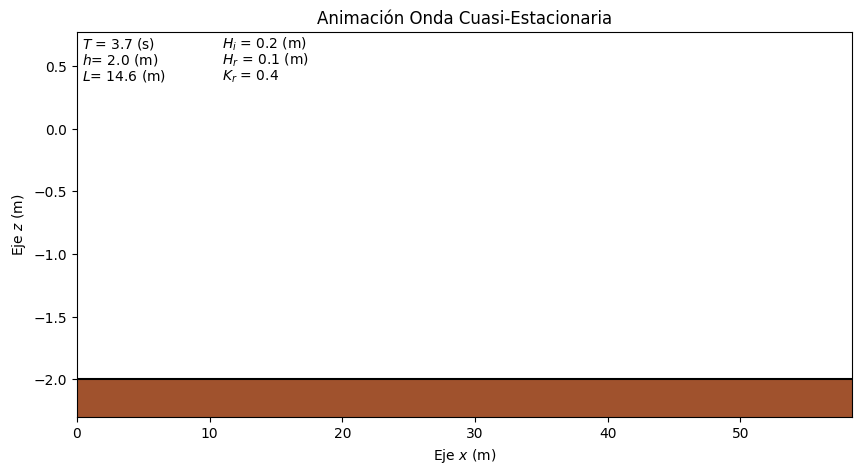

In [3]:
# Crearemos la figura a nuestra necesidad (antojo)
ancho = 10
alto  = 5

#Declaramos figura (fig) y eje (ax)
fig, ax = plt.subplots(figsize=(ancho,alto))

Ix = (H_t/2)*np.cos(k*x) + (H_p/2)*np.cos(k*x+epsilon)
Fx = (H_t/2)*np.sin(k*x) - (H_p/2)*np.sin(k*x+epsilon)

env_up   = np.sqrt(Ix**2 + Fx**2)
env_down = -np.sqrt(Ix**2 + Fx**2)

#Definir cosas que no se mueven (estáticas)
ax.set_xlabel('Eje $x$ (m)')
ax.set_ylabel('Eje $z$ (m)')
ax.set_title('Animación Onda Cuasi-Estacionaria')
ax.set_xlim(x[0],x[-1])
ax.set_ylim(-1.15*h,3*(H_t+H_p))
ax.axhline(y=-h, color='k')
ax.fill_between(x,-1.15*h,-h,color='sienna')


ax.text(0.025*L,2.5*(H_t+H_p),'$T$ = %1.1f (s)' % (T,),horizontalalignment='left')
ax.text(0.025*L,2.0*(H_t+H_p),'$h$= %1.1f (m)' % (h,),horizontalalignment='left')
ax.text(0.025*L,1.5*(H_t+H_p),'$L$= %1.1f (m)' % (L,),horizontalalignment='left')

ax.text(0.75*L,2.5*(H_t+H_p),'$H_{i}$ = %1.1f (m)' % (H_t,),horizontalalignment='left')
ax.text(0.75*L,2.0*(H_t+H_p),'$H_{r}$ = %1.1f (m)' % (H_p,),horizontalalignment='left')
ax.text(0.75*L,1.5*(H_t+H_p),'$K_{r}$ = %1.1f' % (H_p/H_t,),horizontalalignment='left')
#ax.text(np.mean(x),2.5*(H_t+H_p),prof_rel(h/L),horizontalalignment='center')

In [4]:
#Definimos las cosas animadas
line, = ax.plot([],[],linewidth=1.0,color='k')
time_text = ax.text(4*L,2.5*(H_t+H_p),'',fontsize=10,horizontalalignment='right')
water = ax.fill_between(x,-h,np.ones(len(x)),color='dodgerblue')

ax.plot(x,env_up,c='darkorange',linestyle='--',linewidth=1.25,label='Envolvente')
ax.plot(x,env_down,c='darkorange',linestyle='--',linewidth=1.25)
ax.legend(loc=9)

def animate(t):
  eta = (H_t/2)*np.cos(k*x-omega*t) + (H_p/2)*np.cos(k*x+omega*t+epsilon)
  time_text.set_text('Tiempo = %0.0f (s)' % (t,))
  line.set_data(x,eta)
  #modificamos eta en la superficie libre
  path_water = water.get_paths()[0]
  path_water.vertices[np.size(x)+1:2*np.size(x)+1, 1] = eta[::-1]
  path_water.vertices[0, 1] = eta[0]
  path_water.vertices[-1, 1] = eta[0]
  return line,time_text

anim = animation.FuncAnimation(fig,animate,frames=t_total+1,interval=500,blit=False)
anim.save('Onda_Cuasi-Estacionaria.mp4',dpi=300)

HTML(anim.to_jshtml())